# Loading Dataset

In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/LiethS/EECS3401-Final-Project/main/csgo_players.csv"
stats = pd.read_csv(url, sep=',')

# Backup copy of the dataset
stats_backup = stats

# Look at the Structure

In [25]:
stats

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,472,B1ad3,Andrey Gorodenskiy,35,Ukraine,Natus Vincere,FlipSid3,13472,16880,41.9%,...,582,105,7,10064,67,860,2256,118,108,0.83
807,8422,netrick,Jonas Wenzelsen,27,Denmark,AGF,"AGF, unknown, LPSP, Forcebuy",6753,8489,48.2%,...,299,52,4,4770,120,586,1106,178,13,0.82
808,7415,HUNDEN,Nicolai Petersen,31,Denmark,NaN,"Tricked, ALTERNATE aTTaX",22470,28708,48.7%,...,923,121,13,16737,220,1514,3589,402,50,0.81
809,13156,RuFire,Aleksei Burakov,27,Russia,BakS,"SG.pro, 5balls, VP.Prodigy",5654,7613,47.9%,...,218,48,1,4051,151,623,669,84,92,0.84


In [26]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          811 non-null    int64  
 1   nickname                           811 non-null    object 
 2   real_name                          811 non-null    object 
 3   age                                811 non-null    int64  
 4   country                            811 non-null    object 
 5   current_team                       514 non-null    object 
 6   teams                              811 non-null    object 
 7   total_kills                        811 non-null    int64  
 8   total_deaths                       811 non-null    int64  
 9   headshot_percentage                811 non-null    object 
 10  damage_per_round                   811 non-null    float64
 11  grenade_dmg_per_round              811 non-null    float64

# Cleaning

In [27]:
# Transform some of the percentage values to decimal values since it makes more sense and helps with making life easier
stats['headshot_percentage'] = stats['headshot_percentage'].str.rstrip('%')
stats['headshot_percentage'] = pd.to_numeric(stats['headshot_percentage'])
stats['team_win_percent_after_first_kill'] = stats['team_win_percent_after_first_kill'].str.rstrip('%')
stats['first_kill_in_won_rounds'] = stats['first_kill_in_won_rounds'].str.rstrip('%')
stats['team_win_percent_after_first_kill'] = pd.to_numeric(stats['team_win_percent_after_first_kill'])
stats['first_kill_in_won_rounds'] = pd.to_numeric(stats['first_kill_in_won_rounds'])
# Eliminate the unnecessary values as well as some troublesome ones.
stats.drop(labels=['player_id', 'teams', 'current_team', 'country', 'nickname', 'real_name', 'kill_to_death_diff'], axis=1, inplace=True)
# View the new structure
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                811 non-null    int64  
 1   total_kills                        811 non-null    int64  
 2   total_deaths                       811 non-null    int64  
 3   headshot_percentage                811 non-null    float64
 4   damage_per_round                   811 non-null    float64
 5   grenade_dmg_per_round              811 non-null    float64
 6   maps_played                        811 non-null    int64  
 7   rounds_played                      811 non-null    int64  
 8   kills_per_death                    811 non-null    float64
 9   kills_per_round                    811 non-null    float64
 10  assists_per_round                  811 non-null    float64
 11  deaths_per_round                   811 non-null    float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_kills'}>,
        <Axes: title={'center': 'total_deaths'}>,
        <Axes: title={'center': 'headshot_percentage'}>,
        <Axes: title={'center': 'damage_per_round'}>,
        <Axes: title={'center': 'grenade_dmg_per_round'}>],
       [<Axes: title={'center': 'maps_played'}>,
        <Axes: title={'center': 'rounds_played'}>,
        <Axes: title={'center': 'kills_per_death'}>,
        <Axes: title={'center': 'kills_per_round'}>,
        <Axes: title={'center': 'assists_per_round'}>,
        <Axes: title={'center': 'deaths_per_round'}>],
       [<Axes: title={'center': 'saved_by_teammate_per_round'}>,
        <Axes: title={'center': 'saved_teammates_per_round'}>,
        <Axes: title={'center': 'rounds_with_kills'}>,
        <Axes: title={'center': 'total_opening_kills'}>,
        <Axes: title={'center': 'total_opening_deaths'}>,
        <Axes: title={'center': 'opening_kill_ratio'}>],
       [<Axes: tit

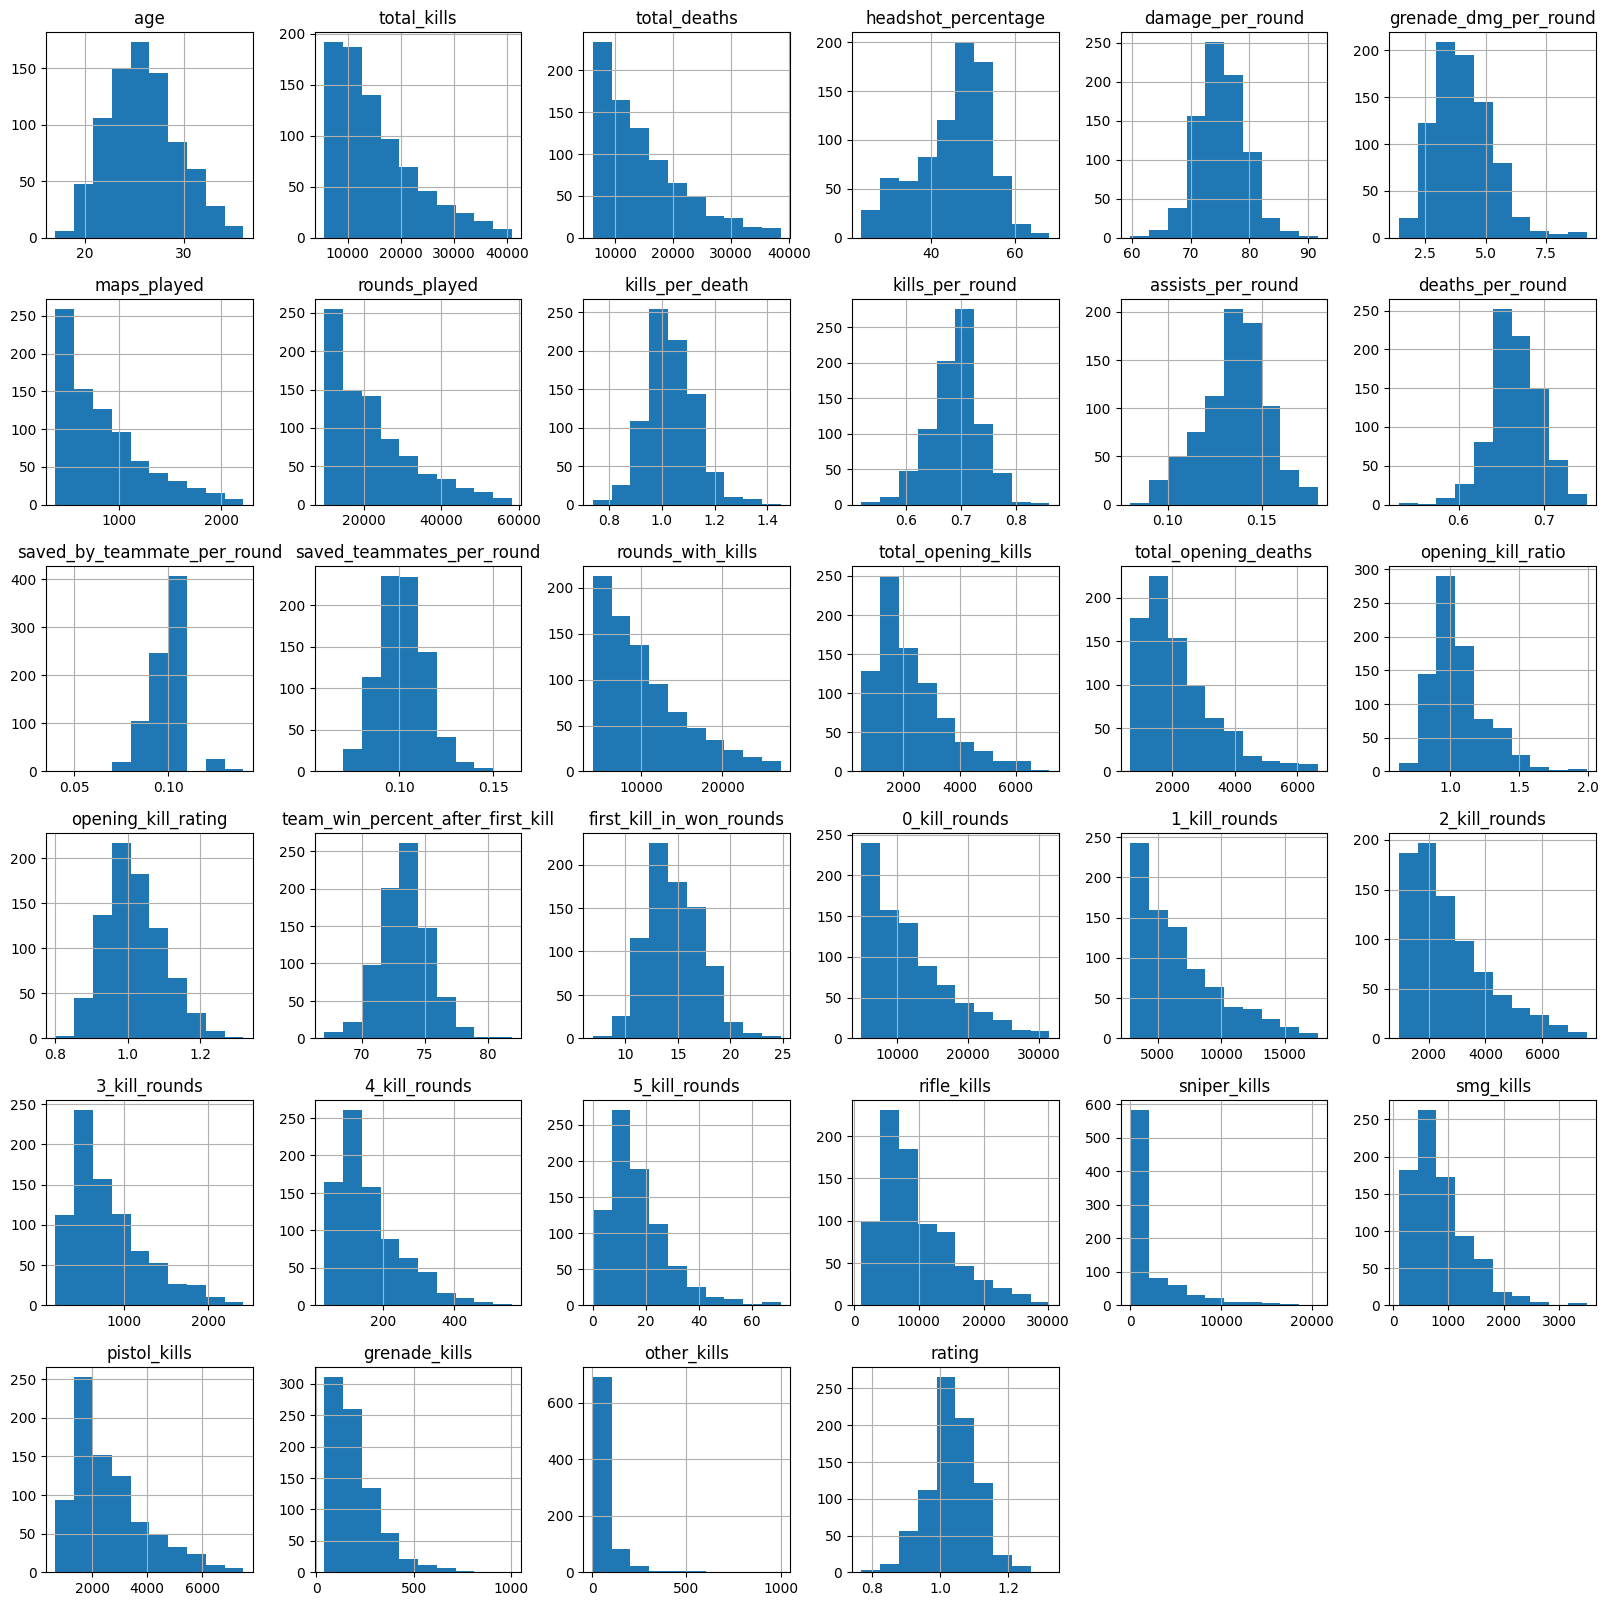

In [28]:
stats.hist(figsize=(20, 20))

In [29]:
# Create a correlation mattrix for the dataset
corr_matrix = stats.corr(numeric_only=True)
corr_matrix
# Find any possible correlations b/w headshot percentage and any other attributes
corr_matrix["headshot_percentage"].sort_values(ascending=False)

headshot_percentage                  1.000000
deaths_per_round                     0.422806
rifle_kills                          0.371260
saved_by_teammate_per_round          0.365004
assists_per_round                    0.346836
grenade_dmg_per_round                0.208078
saved_teammates_per_round            0.185143
damage_per_round                     0.095105
smg_kills                            0.092327
total_opening_deaths                 0.036660
5_kill_rounds                        0.021406
total_deaths                         0.010108
0_kill_rounds                       -0.010882
4_kill_rounds                       -0.015583
rounds_played                       -0.027429
maps_played                         -0.030092
grenade_kills                       -0.041079
3_kill_rounds                       -0.041838
1_kill_rounds                       -0.044455
total_kills                         -0.044915
rounds_with_kills                   -0.045537
pistol_kills                      

Text(0, 0.5, 'deaths_per_round')

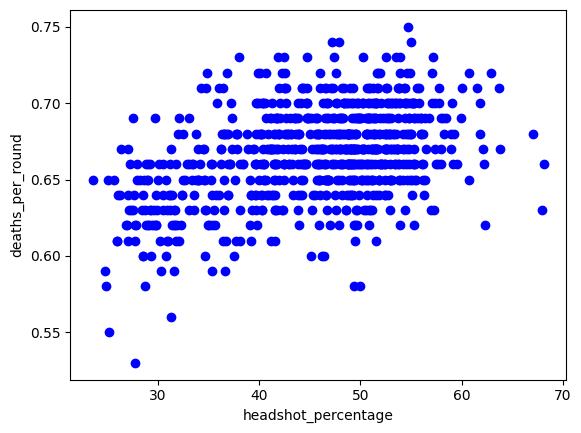

In [30]:
# Create a scatterplot of headshot_percentage and deaths_per_round
X = stats['headshot_percentage']
y = stats['deaths_per_round']
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel('headshot_percentage')
plt.ylabel('deaths_per_round')

Text(0, 0.5, 'rifle_kills')

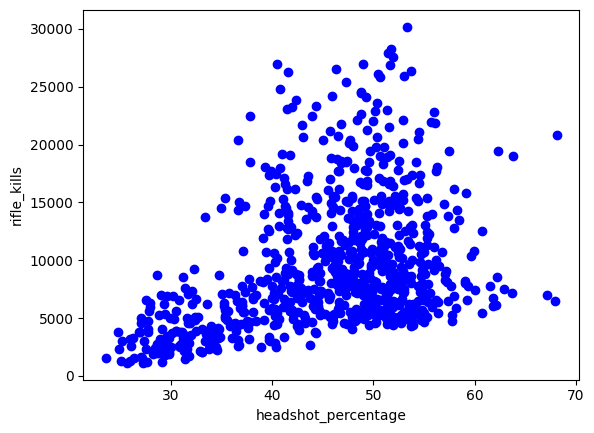

In [31]:
# Create a scatterplot of headshot_percentage and rifle_kills
X = stats['headshot_percentage']
y = stats['rifle_kills']
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel('headshot_percentage')
plt.ylabel('rifle_kills')

Text(0, 0.5, 'damage_per_round')

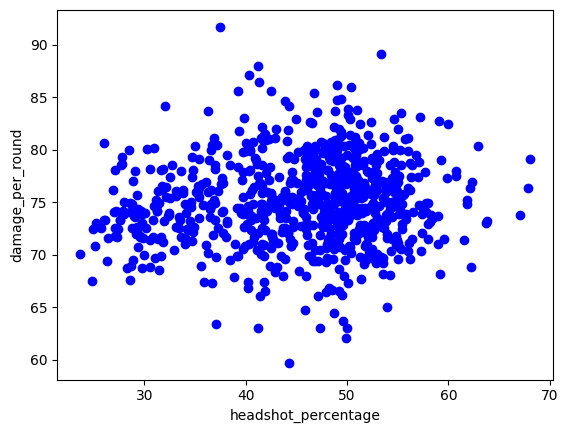

In [32]:
# Create a scatterplot of headshot_percentage and damage_per_round
X = stats['headshot_percentage']
y = stats['damage_per_round']
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel('headshot_percentage')
plt.ylabel('damage_per_round')

In [33]:
# Now that the general data cleaning is done I've seperated the target and the features
X = stats.drop(["headshot_percentage"], axis=1)
y = stats["headshot_percentage"]

In [34]:
# There shouldn't be any duplicates, just to be safe
X.duplicated().sum()

0

In [35]:
# There shouldn't be any missing values, just to be safe
X.isna().sum()

age                                  0
total_kills                          0
total_deaths                         0
damage_per_round                     0
grenade_dmg_per_round                0
maps_played                          0
rounds_played                        0
kills_per_death                      0
kills_per_round                      0
assists_per_round                    0
deaths_per_round                     0
saved_by_teammate_per_round          0
saved_teammates_per_round            0
rounds_with_kills                    0
total_opening_kills                  0
total_opening_deaths                 0
opening_kill_ratio                   0
opening_kill_rating                  0
team_win_percent_after_first_kill    0
first_kill_in_won_rounds             0
0_kill_rounds                        0
1_kill_rounds                        0
2_kill_rounds                        0
3_kill_rounds                        0
4_kill_rounds                        0
5_kill_rounds            

In [36]:
#seperate the numerical attributes from the categoricals
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

In [37]:
num_cols

['age',
 'total_kills',
 'total_deaths',
 'damage_per_round',
 'grenade_dmg_per_round',
 'maps_played',
 'rounds_played',
 'kills_per_death',
 'kills_per_round',
 'assists_per_round',
 'deaths_per_round',
 'saved_by_teammate_per_round',
 'saved_teammates_per_round',
 'rounds_with_kills',
 'total_opening_kills',
 'total_opening_deaths',
 'opening_kill_ratio',
 'opening_kill_rating',
 'team_win_percent_after_first_kill',
 'first_kill_in_won_rounds',
 '0_kill_rounds',
 '1_kill_rounds',
 '2_kill_rounds',
 '3_kill_rounds',
 '4_kill_rounds',
 '5_kill_rounds',
 'rifle_kills',
 'sniper_kills',
 'smg_kills',
 'pistol_kills',
 'grenade_kills',
 'other_kills',
 'rating']

In [38]:
# There are no categorical attributes, however I'll keep this as it was part of the process
cat_cols

[]

# Preprocessing

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [40]:
# Create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough'
                                 )

# Apply the preprocessing pipeline on the dataset
X_prepared = preprocessing.fit_transform(X)

feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared

,num__age,num__total_kills,num__total_deaths,num__damage_per_round,num__grenade_dmg_per_round,num__maps_played,num__rounds_played,num__kills_per_death,num__kills_per_round,num__assists_per_round,...,num__3_kill_rounds,num__4_kill_rounds,num__5_kill_rounds,num__rifle_kills,num__sniper_kills,num__smg_kills,num__pistol_kills,num__grenade_kills,num__other_kills,num__rating
0,-1.313156,0.958718,0.243155,3.129467,-0.398734,0.434833,0.432279,3.653677,3.399472,-0.603942,...,1.525119,2.338744,4.986631,-0.220529,1.918977,0.875753,1.224721,0.503935,-0.212665,3.934106
1,-0.501235,2.652243,1.647555,2.740993,-1.409803,1.791130,1.803338,3.326006,3.847906,-1.735113,...,3.364261,3.855834,4.339891,0.929885,3.379639,0.117712,2.582807,0.013280,2.499152,2.969566
2,-1.313156,0.363422,-0.316348,0.847182,-0.145967,0.100066,0.119385,4.527467,1.829953,-1.169528,...,0.593879,0.675565,1.198582,-1.017051,2.523636,-0.566279,0.275952,-0.179764,0.065131,3.107358
3,-1.313156,-0.865401,-1.176199,1.284216,-0.567246,-1.081463,-1.050981,3.653677,2.502604,-1.735113,...,-0.706124,-0.549345,-0.834029,-1.217875,0.665532,-1.285347,-0.896013,-0.895638,-0.331721,2.693983
4,0.310686,-0.899035,-1.159270,1.235656,-0.904269,-1.081463,-1.070770,2.889110,2.278387,-1.735113,...,-0.692120,-0.526869,-0.279681,-1.239080,0.684614,-1.123605,-1.085161,-1.169118,-0.490461,2.556192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2.475809,-0.243435,0.302688,-2.090652,-1.241292,0.136989,0.098942,-2.572079,-2.430169,1.658400,...,-0.556752,-0.628009,-0.926421,0.100753,-0.610871,0.037816,-0.293007,-0.638245,0.567809,-2.817673
807,0.310686,-1.126196,-0.881071,-2.017814,2.128938,-0.955925,-0.951754,-2.572079,-2.878603,0.527229,...,-1.217256,-1.223607,-1.203595,-0.842601,-0.595069,-0.496126,-1.163090,-0.155634,-0.688887,-2.955464
808,1.393247,0.938748,1.971321,-2.600525,0.359567,1.808360,1.771787,-2.790526,-3.102820,0.527229,...,0.239121,-0.448206,-0.372072,1.289835,-0.565254,1.312261,0.715533,1.646115,-0.199437,-3.093256
809,0.310686,-1.270586,-1.004652,-2.114932,0.528079,-1.118385,-1.105028,-3.227421,-3.102820,0.527229,...,-1.406304,-1.268558,-1.480769,-0.970721,-0.585826,-0.424024,-1.493722,-0.911725,0.356155,-2.679881


In [41]:
X_prepared.columns

Index(['num__age', 'num__total_kills', 'num__total_deaths',
       'num__damage_per_round', 'num__grenade_dmg_per_round',
       'num__maps_played', 'num__rounds_played', 'num__kills_per_death',
       'num__kills_per_round', 'num__assists_per_round',
       'num__deaths_per_round', 'num__saved_by_teammate_per_round',
       'num__saved_teammates_per_round', 'num__rounds_with_kills',
       'num__total_opening_kills', 'num__total_opening_deaths',
       'num__opening_kill_ratio', 'num__opening_kill_rating',
       'num__team_win_percent_after_first_kill',
       'num__first_kill_in_won_rounds', 'num__0_kill_rounds',
       'num__1_kill_rounds', 'num__2_kill_rounds', 'num__3_kill_rounds',
       'num__4_kill_rounds', 'num__5_kill_rounds', 'num__rifle_kills',
       'num__sniper_kills', 'num__smg_kills', 'num__pistol_kills',
       'num__grenade_kills', 'num__other_kills', 'num__rating'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

# I chose a split of 20% test size and 80% training size, no real reason I just thought it was a fair ratio of training to testing
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(648, 33) (648,) (163, 33) (163,)


# Training

In [43]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [44]:
# Create a Linear Regression model
lr_model = LinearRegression()
# Fit the model on the training data
lr_model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Create a KNN Regressor
knnr_model = KNeighborsRegressor(n_neighbors=3)
# Fit the model on the training data
knnr_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [46]:
# Create an SVR regressor
svr_model = SVR(kernel='rbf', C=1.0)
# Fit the model on the training data
svr_model.fit(X_train, y_train)

SVR()

# Testing

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
# Allow the models to perform their predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_knnr = knnr_model.predict(X_test)

# Evaluate their performance using mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_knnr = mean_squared_error(y_test, y_pred_knnr)

print(f"Linear Regression - MSE: {mse_lr}")
print(f"SVM Regression - MSE: {mse_svr}")
print(f"KNN Regression - MSE: {mse_knnr}")

Linear Regression - MSE: 20.764291039591154
SVM Regression - MSE: 24.8317368442516
KNN Regression - MSE: 30.042515337423303


# Linear Regression Model Graphs

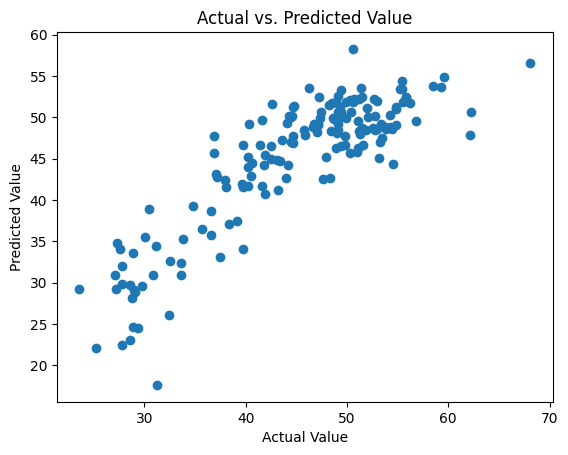

In [49]:
# Firstly let's analyze the results of the predictions against the expected values.
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Value')
plt.show()

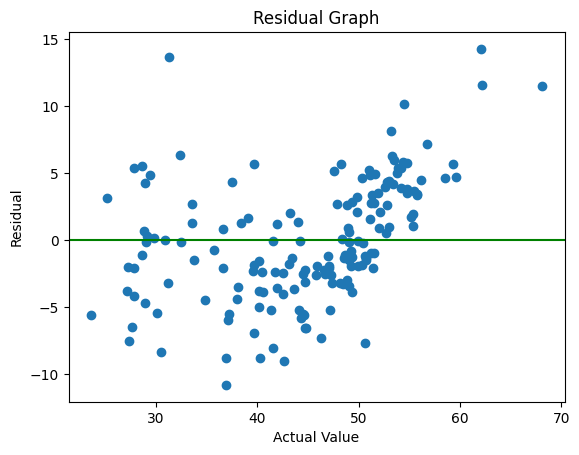

In [50]:
# To analyze the accurazy I've created a residual graph to see the error margine of the predictions.
residuals = y_test - y_pred_lr
plt.scatter(y_test, residuals)
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.title('Residual Graph')
plt.axhline(y=0, color='g', linestyle='-')
plt.show()

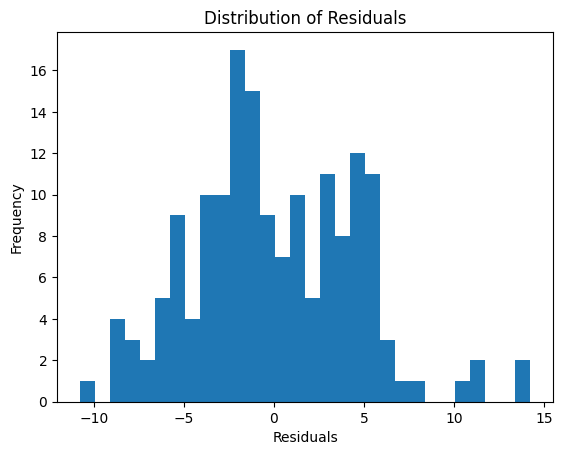

In [51]:
# To analyze the residual graph more clearly I decided to create a graph of the distribution of residuals. We want the data in this graph to favour 0 as that indicates higher accuracy.
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()